### Model określający zależność temperatury odczuwalnej od prędkości wiatru i wilgotności. Przydatny przy projektowaniu odzieży dla różnych warunków klimatycznych. 

### Wczytanie danych

In [ ]:
import pandas as pd

df = pd.read_csv("weatherHistory.csv", parse_dates=True, index_col="Formatted Date")
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [ ]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

### Zmiana nazw kolumn na takie, które nie mają spacji 

In [ ]:
df = df.rename(columns={'Precip Type' : 'Precip_Type', 'Temperature (C)' : 'Temperature_(C)', 
                   'Apparent Temperature (C)': 'Apparent_Temperature_(C)',
       'Wind Speed (km/h)' : 'Wind_Speed_(km/h)' , 'Wind Bearing (degrees)' :'Wind_Bearing_(degrees)',
       'Visibility (km)':'Visibility_(km)', 'Loud Cover':'Loud_Cover', 'Pressure (millibars)': 'Pressure_(millibars)',
       'Daily Summary':'Daily_Summary'})

### Sprawdzenie ilości niepustych wierszy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip_Type               95936 non-null  object 
 2   Temperature_(C)           96453 non-null  float64
 3   Apparent_Temperature_(C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind_Speed_(km/h)         96453 non-null  float64
 6   Wind_Bearing_(degrees)    96453 non-null  float64
 7   Visibility_(km)           96453 non-null  float64
 8   Loud_Cover                96453 non-null  float64
 9   Pressure_(millibars)      96453 non-null  float64
 10  Daily_Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 10.8+ MB


### Zamiana wartości niekomplatnych (NaN) na wartość "no_fall"

In [ ]:
df = df.fillna('no_fall')

df[df.Precip_Type == 'no_fall']

,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
Formatted Date,,,,,,,,,,,
2012-04-11 16:00:00+02:00,Mostly Cloudy,no_fall,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
2012-04-11 18:00:00+02:00,Mostly Cloudy,no_fall,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
2012-04-11 19:00:00+02:00,Mostly Cloudy,no_fall,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
2012-04-11 21:00:00+02:00,Mostly Cloudy,no_fall,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
2012-04-11 22:00:00+02:00,Mostly Cloudy,no_fall,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-31 19:00:00+01:00,Mostly Cloudy,no_fall,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.
2016-10-31 20:00:00+01:00,Mostly Cloudy,no_fall,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.
2016-10-31 21:00:00+01:00,Mostly Cloudy,no_fall,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip_Type               96453 non-null  object 
 2   Temperature_(C)           96453 non-null  float64
 3   Apparent_Temperature_(C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind_Speed_(km/h)         96453 non-null  float64
 6   Wind_Bearing_(degrees)    96453 non-null  float64
 7   Visibility_(km)           96453 non-null  float64
 8   Loud_Cover                96453 non-null  float64
 9   Pressure_(millibars)      96453 non-null  float64
 10  Daily_Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 10.8+ MB


In [ ]:
df.describe()

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
df.Precip_Type.value_counts()

rain       85224
snow       10712
no_fall      517
Name: Precip_Type, dtype: int64

In [ ]:
df.Daily_Summary.value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

### Temperatura odczuwalna w zależności od wilgotności i wiatru 

In [ ]:
df_2 = df[['Apparent_Temperature_(C)', 'Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', ]]
df_2

,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h)
Formatted Date,,,,
2006-04-01 00:00:00+02:00,7.388889,9.472222,0.89,14.1197
2006-04-01 01:00:00+02:00,7.227778,9.355556,0.86,14.2646
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284
2006-04-01 03:00:00+02:00,5.944444,8.288889,0.83,14.1036
2006-04-01 04:00:00+02:00,6.977778,8.755556,0.83,11.0446
...,...,...,...,...
2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43,10.9963
2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48,10.0947
2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56,8.9838


In [ ]:
df_2.describe()

,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,10.855029,11.932678,0.734899,10.810640
std,10.696847,9.551546,0.195473,6.913571
min,-27.716667,-21.822222,0.000000,0.000000
25%,2.311111,4.688889,0.600000,5.828200
50%,12.000000,12.000000,0.780000,9.965900
75%,18.838889,18.838889,0.890000,14.135800
max,39.344444,39.905556,1.000000,63.852600


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

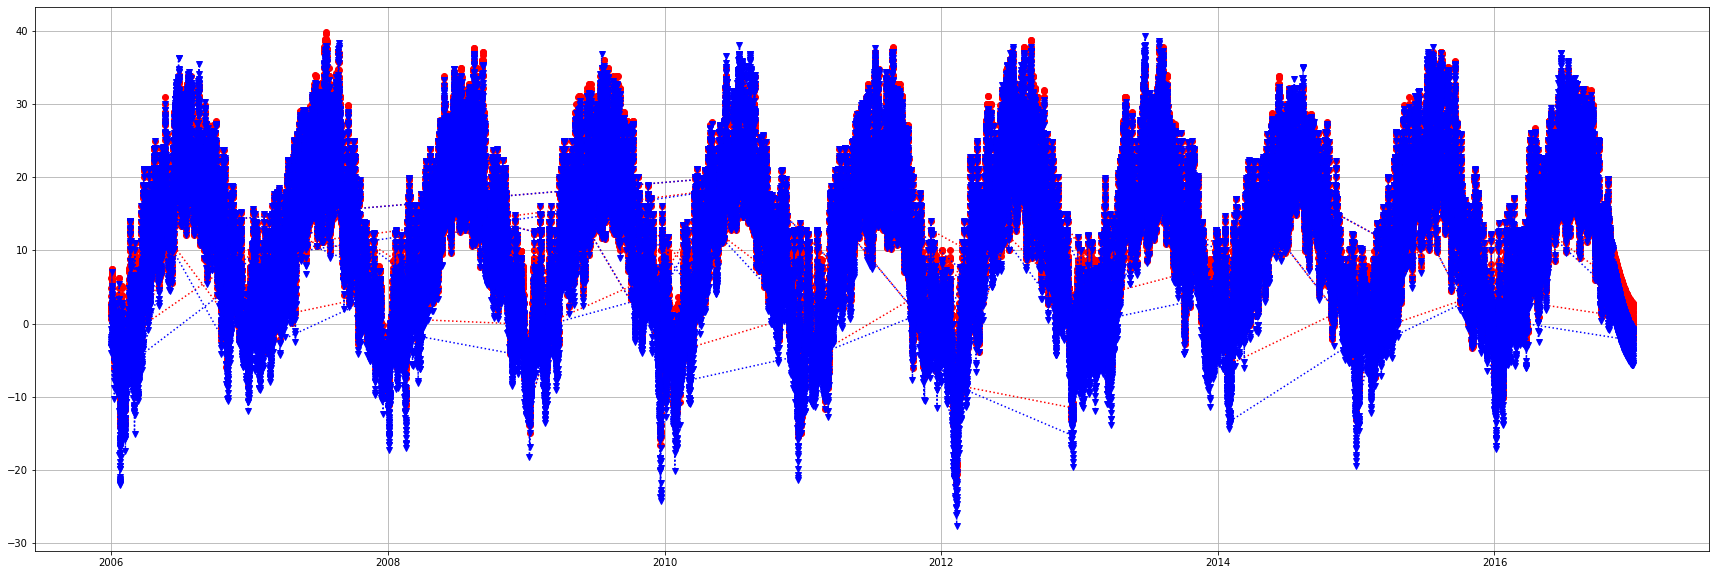

In [ ]:
fig, ax = plt.subplots(figsize=[30,10])
x = df_2['Temperature_(C)']
y = df_2['Apparent_Temperature_(C)']

ax.plot(df_2.index[:], df_2['Temperature_(C)'][:], marker='o', linestyle='dotted', color='red')
ax.plot(df_2.index[:], df_2['Apparent_Temperature_(C)'][:], marker='v', linestyle='dotted', color='blue')
ax.grid()
plt.show()

### Wykres wskazuje na zależność pomiędzy temperaturą odczuwalną a rzeczywistą. Większe rozbieżności są w przypadku temperatur niższych. Zwykle temperatura odczuwalna jest niższa niż rzeczywista. 

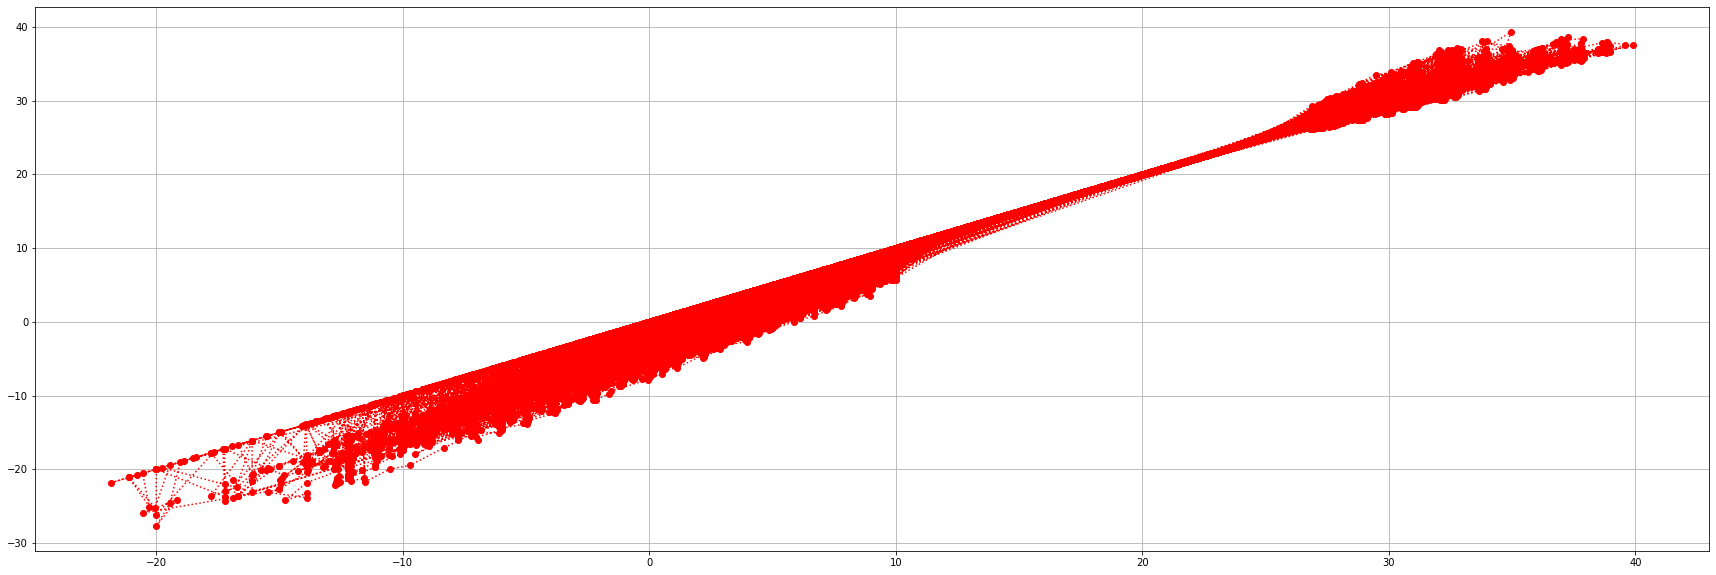

In [ ]:
fig, ax = plt.subplots(figsize=[30,10])

ax.plot(df_2['Temperature_(C)'][:], df_2['Apparent_Temperature_(C)'][:], marker='o', linestyle='dotted', color='red')
ax.grid()
plt.show()

### Wykres wskazuje na zależność liniową pomiędzy temperaturą odczuwalną a rzeczywistą. 

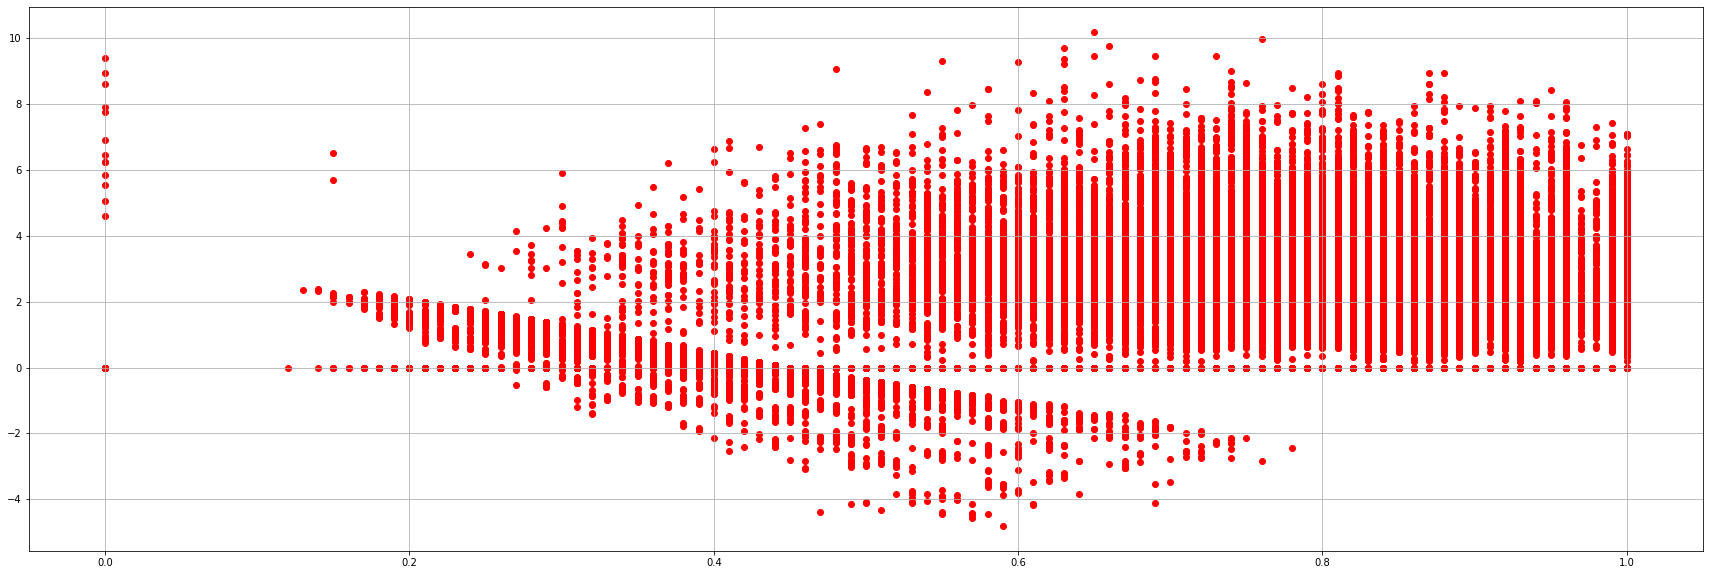

In [ ]:
diff_temp = df_2['Temperature_(C)'] - df_2['Apparent_Temperature_(C)']
diff_temp

fig, ax = plt.subplots(figsize=[30,10])

# ax.plot(df_2['Humidity'][:], diff_temp[:], marker='o', linestyle='dotted', color='red')
ax.scatter(df_2['Humidity'][:], diff_temp[:], marker='o', color='red')
ax.grid()
plt.show()

### Wilgotność może wpływać na odczuwalność termperatury nawet o ok. 10 stopni. Im wyższa wilgotność, tym różnica pomiędzy temperaturą rzeczywistą a odczuwalną jest większa. 

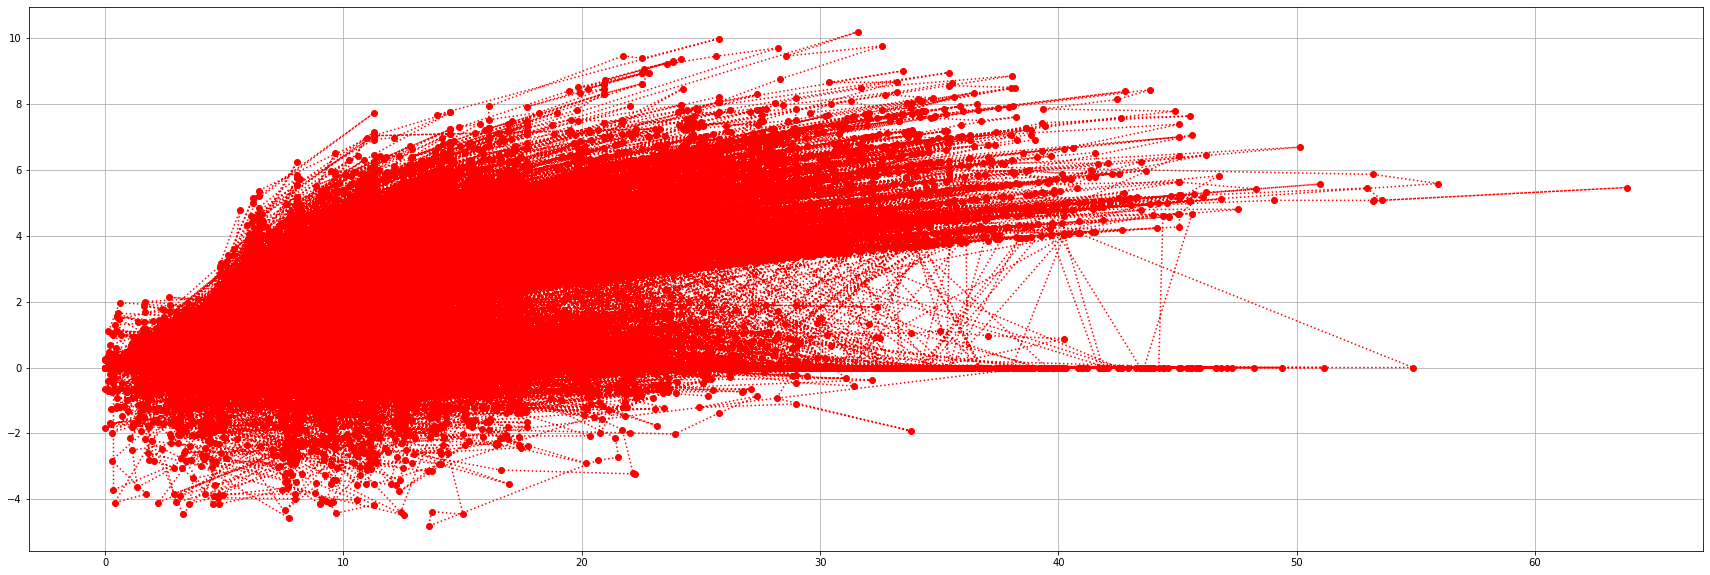

In [ ]:
diff_temp = df_2['Temperature_(C)'] - df_2['Apparent_Temperature_(C)']
diff_temp

fig, ax = plt.subplots(figsize=[30,10])

ax.plot(df_2['Wind_Speed_(km/h)'][:], diff_temp[:], marker='o', linestyle='dotted', color='red')
ax.grid()
plt.show()

### Wykres wskazuje na to, że prędkość wiatru wpływa również na różnicę temperatury rzeczywistej a odczuwalnej. Przy wzroście prędkości wiatru zwiększa się różnica pomiędzy temperaturą rzeczywistą a odczuwalną. Im silniejszy wiatr tym temperatura odczuwalna jest niższa. 

### Wyodrębiamy przedział wilgotności od 40 % do 80 % ze względu na największą różnicę pomiędzy wartościami różnic temperatury odczuwalnej a rzeczywistej.  

In [ ]:
df_2.head()

,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h)
Formatted Date,,,,
2006-04-01 00:00:00+02:00,7.388889,9.472222,0.89,14.1197
2006-04-01 01:00:00+02:00,7.227778,9.355556,0.86,14.2646
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284
2006-04-01 03:00:00+02:00,5.944444,8.288889,0.83,14.1036
2006-04-01 04:00:00+02:00,6.977778,8.755556,0.83,11.0446


In [ ]:
humidity_04_08 = df_2[(df_2['Humidity'] >= 0.4) & (df_2['Humidity'] <= 0.8)]

humidity_04_08['diff'] =  humidity_04_08['Temperature_(C)'] - humidity_04_08['Apparent_Temperature_(C)']

humidity_04_08.sort_values(by='diff')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h),diff
Formatted Date,,,,,
2010-08-15 12:00:00+02:00,36.833333,32.022222,0.59,13.5723,-4.811111
2010-07-15 12:00:00+02:00,36.950000,32.383333,0.57,7.7119,-4.566667
2010-08-13 15:00:00+02:00,36.600000,32.127778,0.57,12.5258,-4.472222
2010-08-15 14:00:00+02:00,36.361111,31.911111,0.58,15.0213,-4.450000
2013-06-19 19:00:00+02:00,37.227778,32.777778,0.55,3.2683,-4.450000
...,...,...,...,...,...
2009-12-21 07:00:00+01:00,-24.233333,-14.772222,0.73,21.7511,9.461111
2006-01-23 02:00:00+01:00,-21.255556,-11.555556,0.63,28.2394,9.700000
2006-01-22 22:00:00+01:00,-19.477778,-9.716667,0.66,32.6025,9.761111


### Wyodrębiamy przedział prędkości wiatru od 0 do 20 (km/h) ze względu na największą różnicę pomiędzy wartościami różnic temperatury odczuwalnej a rzeczywistej.  

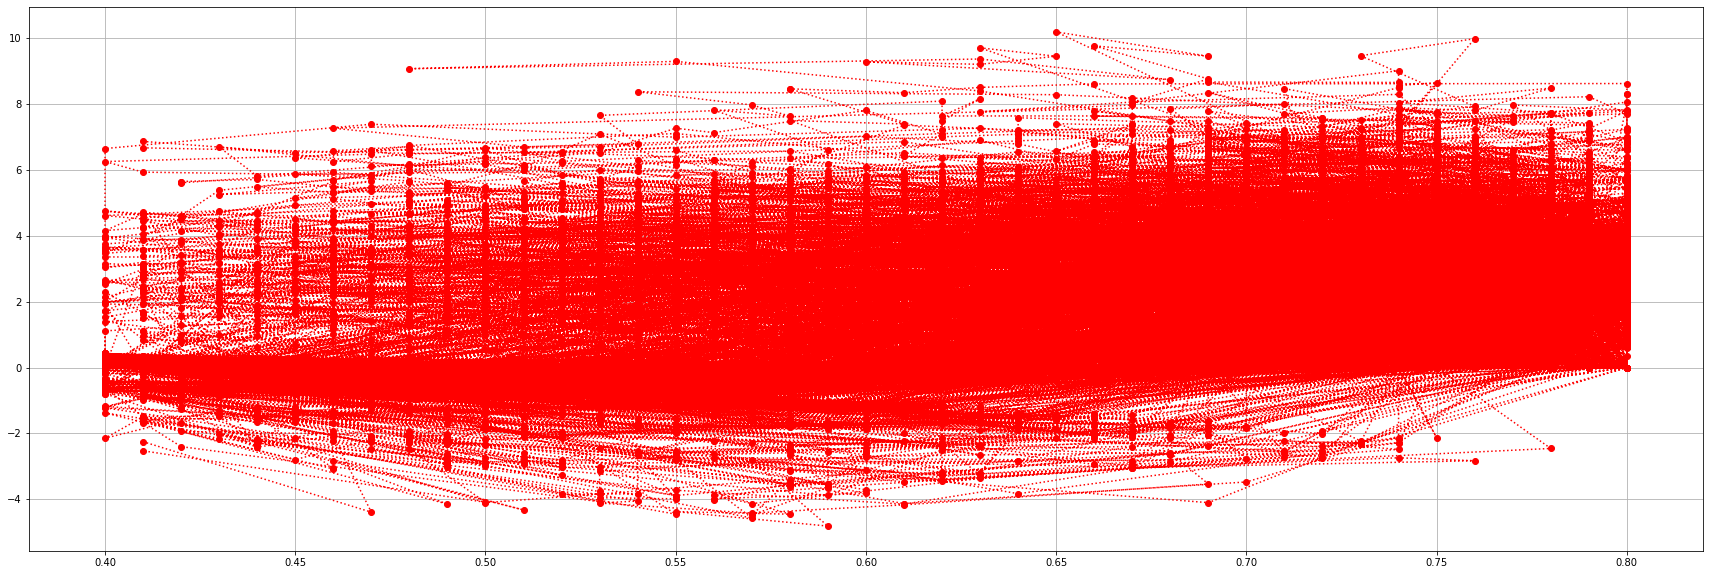

In [ ]:
diff_temp_humidity = humidity_04_08['Temperature_(C)'] - humidity_04_08['Apparent_Temperature_(C)']

fig, ax = plt.subplots(figsize=[30,10])

ax.plot(humidity_04_08['Humidity'][:], diff_temp_humidity[:], marker='o', linestyle='dotted', color='red')

ax.grid()
plt.show()

### Wykres obrazuje wpływ wilgotności z przedziału 40% do 80 %. 

In [ ]:
wind_0_20 = df_2[(df_2['Wind_Speed_(km/h)'] >= 0) & (df_2['Wind_Speed_(km/h)'] <= 20)]

wind_0_20

,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h)
Formatted Date,,,,
2006-04-01 00:00:00+02:00,7.388889,9.472222,0.89,14.1197
2006-04-01 01:00:00+02:00,7.227778,9.355556,0.86,14.2646
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284
2006-04-01 03:00:00+02:00,5.944444,8.288889,0.83,14.1036
2006-04-01 04:00:00+02:00,6.977778,8.755556,0.83,11.0446
...,...,...,...,...
2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43,10.9963
2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48,10.0947
2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56,8.9838


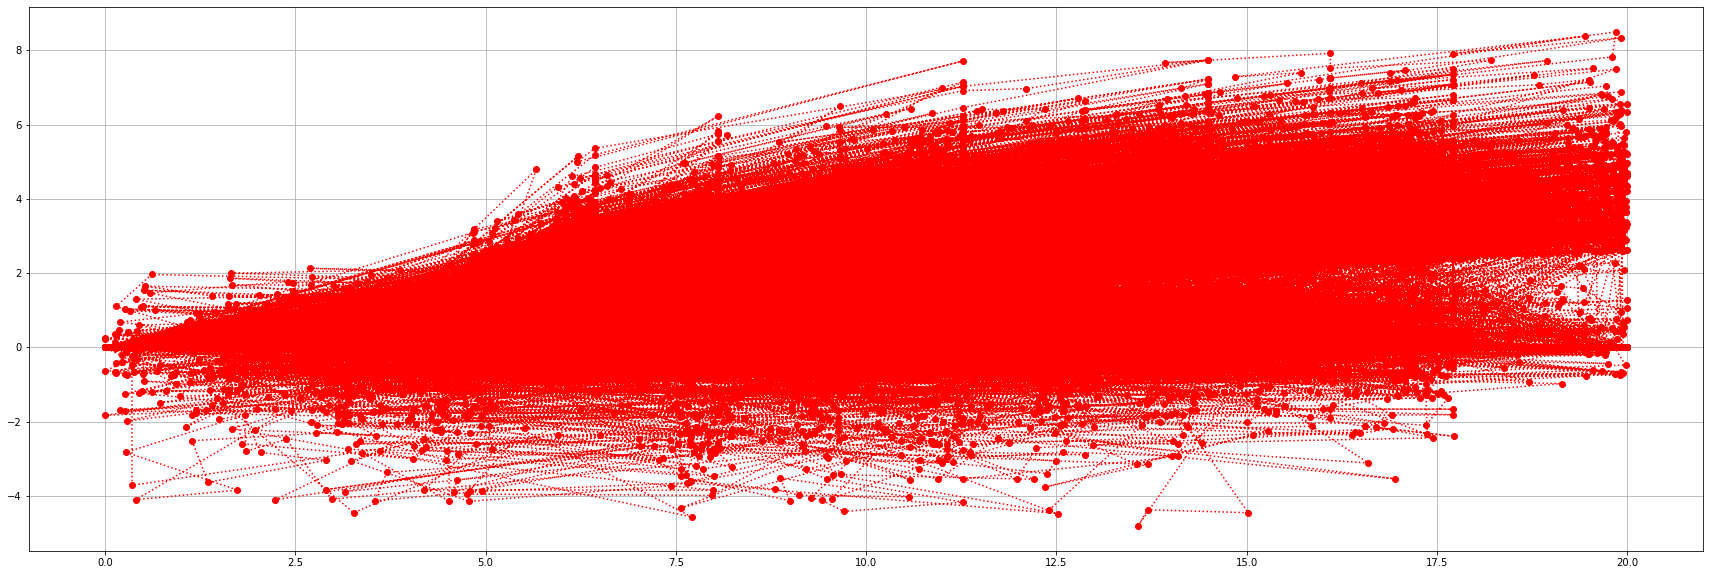

In [ ]:
diff_temp_wind = wind_0_20['Temperature_(C)'] - wind_0_20['Apparent_Temperature_(C)']

fig, ax = plt.subplots(figsize=[30,10])

ax.plot(wind_0_20['Wind_Speed_(km/h)'][:], diff_temp_wind[:], marker='o', linestyle='dotted', color='red')

ax.grid()
plt.show()

### Usuwanie wartości odstających za pomocą odchylenia standardowego

In [ ]:
humidity_04_08_clear = df_2[(df_2['Humidity'] >= 0.4) & (df_2['Humidity'] <= 0.8)]

factor = 2 

upper_lim = humidity_04_08_clear['Humidity'].mean() + humidity_04_08_clear['Humidity'].std() * factor  
lower_lim = humidity_04_08_clear['Humidity'].mean() - humidity_04_08_clear['Humidity'].std() * factor

humidity_04_08_std = humidity_04_08_clear[(humidity_04_08_clear['Humidity'] < upper_lim) & (humidity_04_08_clear['Humidity'] > lower_lim)]

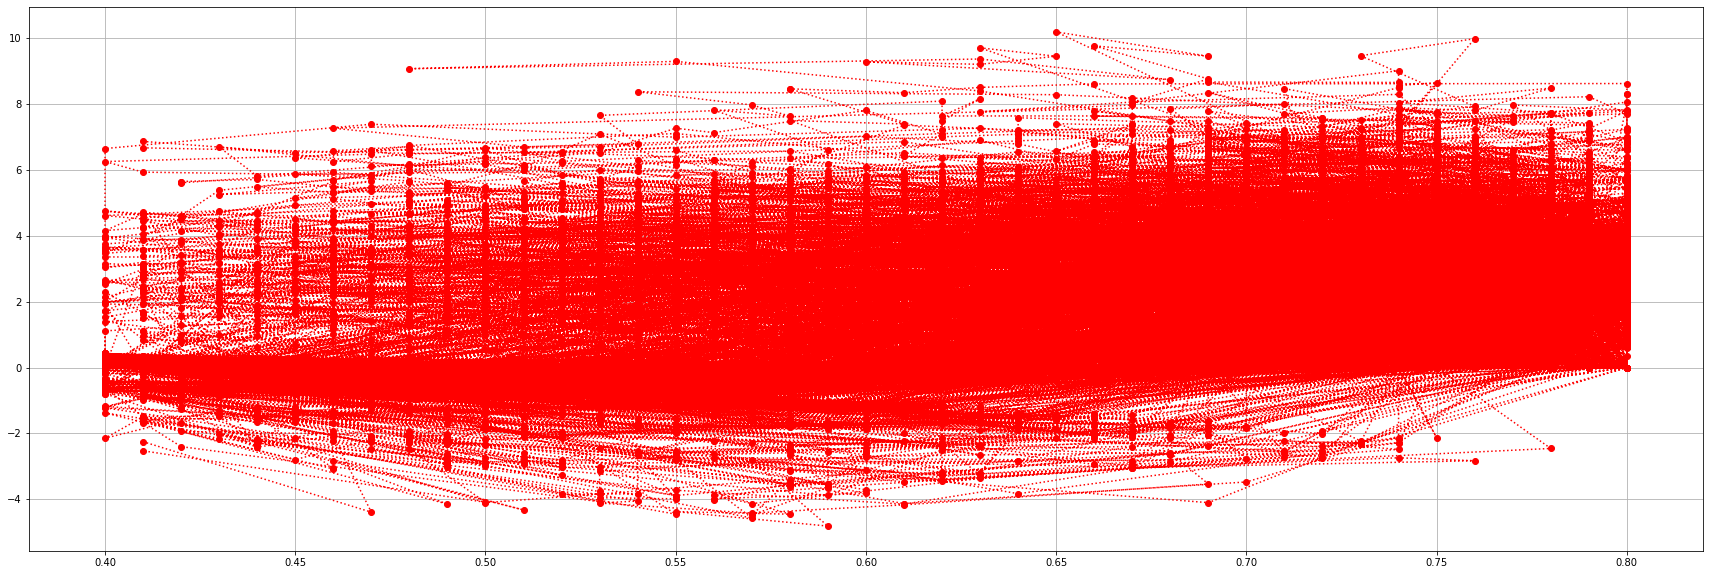

In [ ]:
fig, ax = plt.subplots(figsize=[30,10])

ax.plot(humidity_04_08_clear['Humidity'][:], diff_temp_humidity[:], marker='o', linestyle='dotted', color='red')

ax.grid()
plt.show()

In [ ]:
wind_0_20_clear = df_2[(df_2['Wind_Speed_(km/h)'] >= 0) & (df_2['Wind_Speed_(km/h)'] <= 20)]

factor = 2 

upper_lim = wind_0_20_clear['Wind_Speed_(km/h)'].mean() + wind_0_20_clear['Wind_Speed_(km/h)'].std() * factor  
lower_lim = wind_0_20_clear['Wind_Speed_(km/h)'].mean() - wind_0_20_clear['Wind_Speed_(km/h)'].std() * factor

wind_0_20_std = wind_0_20_clear[(wind_0_20_clear['Wind_Speed_(km/h)'] < upper_lim) & (wind_0_20_clear['Wind_Speed_(km/h)'] > lower_lim)]

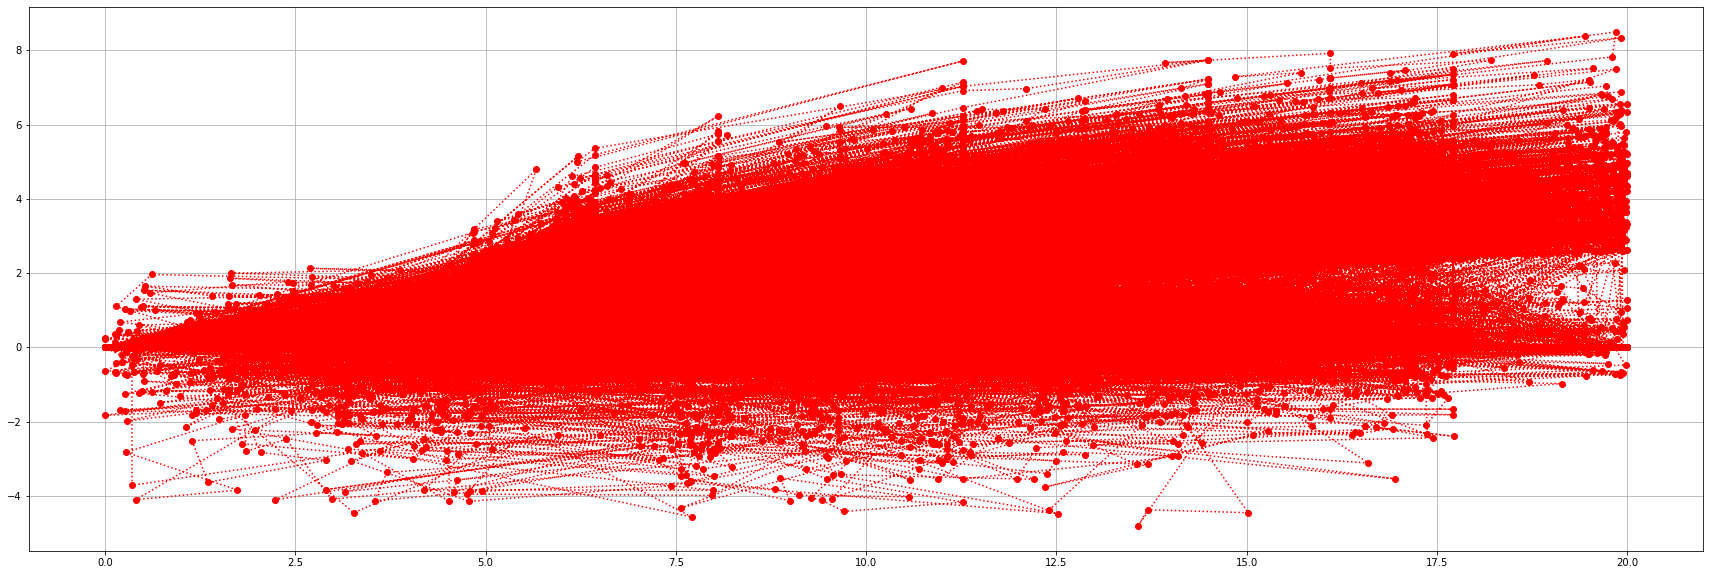

In [ ]:
fig, ax = plt.subplots(figsize=[30,10])

ax.plot(wind_0_20_clear['Wind_Speed_(km/h)'][:], diff_temp_wind[:], marker='o', linestyle='dotted', color='red')

ax.grid()
plt.show()

### Łączymy dwa zbiory danych na potrzeby tworzenia modelu regresji

In [ ]:
best_data_ever = humidity_04_08_std.append(wind_0_20_std)

best_data_ever['diff'] =  best_data_ever['Temperature_(C)'] - best_data_ever['Apparent_Temperature_(C)']

best_data_ever.sort_values(by='diff')

,Apparent_Temperature_(C),Temperature_(C),Humidity,Wind_Speed_(km/h),diff
Formatted Date,,,,,
2010-08-15 12:00:00+02:00,36.833333,32.022222,0.59,13.5723,-4.811111
2010-08-15 12:00:00+02:00,36.833333,32.022222,0.59,13.5723,-4.811111
2010-07-15 12:00:00+02:00,36.950000,32.383333,0.57,7.7119,-4.566667
2010-07-15 12:00:00+02:00,36.950000,32.383333,0.57,7.7119,-4.566667
2010-08-13 15:00:00+02:00,36.600000,32.127778,0.57,12.5258,-4.472222
...,...,...,...,...,...
2009-12-21 07:00:00+01:00,-24.233333,-14.772222,0.73,21.7511,9.461111
2006-01-23 02:00:00+01:00,-21.255556,-11.555556,0.63,28.2394,9.700000
2006-01-22 22:00:00+01:00,-19.477778,-9.716667,0.66,32.6025,9.761111


### Utworzenie modelu regresji liniowej z dwiema zmiennymi. 

In [ ]:
diff_temp_best_data = best_data_ever['Temperature_(C)'] - best_data_ever['Apparent_Temperature_(C)']

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = best_data_ever[['Humidity', 'Wind_Speed_(km/h)']]
y = best_data_ever['diff']

model_linear = LinearRegression()
model_linear.fit(X, y)
print('model.intercept_: ',model_linear.intercept_)
print('model.coef_: ', model_linear.coef_)

model.intercept_:  -2.4080868962456137
model.coef_:  [2.97808389 0.11810034]


### Sprawdzenie działania na przykładowych wartościach 

In [ ]:
predict_data = np.array([[0.50, 14.5], [0.9, 200]])

model_linear.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 0.79341003, 23.89225728])

### Utworzenie modelu drzewa decyzyjnego

In [ ]:
sosna = DecisionTreeRegressor(max_depth = 10 , min_samples_split=10)
sosna.fit(X, y)
sosna.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([0.11975243, 4.57731481])

### Podział danych na zbiory: traningowy, walidacyjny, testowy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(76947, 2) (76947,)
(25650, 2) (25650,)
(25650, 2) (25650,)


### Określenie MSE(Mean Squared Error) dla modelu regresii liniowej z dwiema zmiennymi

In [ ]:
model_linear_train = LinearRegression()
model_linear_train.fit(X_train, y_train)

y_pred_test = model_linear_train.predict(X_test)
y_pred_val = model_linear_train.predict(X_val)

print(mean_squared_error(y_test, y_pred_test))
mean_squared_error(y_val, y_pred_val)

1.7871988493093942


1.781337199045799

### Określenie MSE(Mean Squared Error) dla modelu drzewa decyzyjnego

Pytania:
Jak interpretować MSE? 
Czy w drzewie decyzyjnym MSE można tak zastosować ? 

In [ ]:
model_tree_train = DecisionTreeRegressor(max_depth = 10 , min_samples_split=10)
model_tree_train.fit(X_train, y_train)

y_pred_test_tree = model_tree_train.predict(X_test)
y_pred_val_tree = model_tree_train.predict(X_val)

print(mean_squared_error(y_test, y_pred_test_tree))
mean_squared_error(y_val, y_pred_val_tree)

1.5686986674547156


1.5516066162198894